/home/aliha/Desktop/morphsnakes-master/morphsnakes.py:109: RuntimeWarning: invalid value encountered in sqrt
  return 1.0/np.sqrt(1.0 + alpha*gradnorm)
/home/aliha/Desktop/morphsnakes-master/morphsnakes.py:236: RuntimeWarning: invalid value encountered in greater
  self._threshold_mask = self._data > self._theta
/home/aliha/Desktop/morphsnakes-master/morphsnakes.py:237: RuntimeWarning: invalid value encountered in greater
  self._threshold_mask_v = self._data > self._theta/np.abs(self._v)


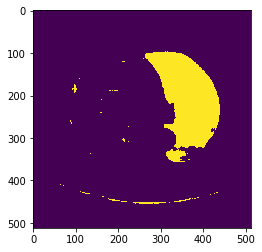

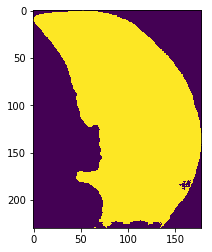

In [12]:
import h5py
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/aliha/Desktop/morphsnakes-master/")
import morphsnakes
import numpy as np
import cv2
%matplotlib inline
import tensorflow as tf
import scipy

PATH_MASK_H5 ="/mnt/dfs/xjyan/269-deeplevelset-segmentation/experiments/269_unet2/test/unet2_3_11_predictions.h5"
PATH_INPUT_H5 = "/mnt/dfs/xjyan/patches/269_test_patch_2class.h5"

msk_h5 = h5py.File(PATH_MASK_H5, "r")
input_h5 = h5py.File(PATH_INPUT_H5, "r")

ex_mask, ex_img, ex_nn_mask = None, None, None

for k, g in msk_h5.items():
    ex_nn_mask = g["binary_mask"][0,:,:,0]
    plt.figure()
    #print(g["pmap"][0,:,:,0].shape)
    plt.imshow(ex_nn_mask) # 512x512x2
    plt.figure()
    ex_img = input_h5[k]["ct_slice"][:,:]
    #plt.imshow(input_h5[k]["ct_slice"][:,:])
    #plt.figure()
    #ex_mask = input_h5[k]["mask"][:,:,0]
    #plt.imshow(input_h5[k]["mask"][:,:,0])
    break


def rgb2gray(img):
    """Convert a RGB image to gray scale."""
    return 0.2989*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

def circle_levelset(shape, center, sqradius, scalerow=1.0):
    """Build a binary function with a circle as the 0.5-levelset."""
    grid = np.mgrid[list(map(slice, shape))].T - center
    phi = sqradius - np.sqrt(np.sum((grid.T)**2, 0))
    
    u = np.float_(phi > 0)
    return u


#img = imageio.imread("testimages/mama07ORI.bmp")[...,0]/255.0
gI = morphsnakes.gborders(ex_img, alpha=1000, sigma=5.48)

# Morphological GAC. Initialization of the level-set.
mgac = morphsnakes.MorphGAC(gI, smoothing=1, threshold=0.31, balloon=1)
#mgac.levelset = circle_levelset(ex_img.shape, (300, 200), 50)

# plt.figure()
# plt.imshow(mgac.levelset)



#labels, nbr_objects =scipy.ndimage.measurements.label(ex_nn_mask)
labels, n=scipy.ndimage.measurements.label(ex_nn_mask)

new_image=scipy.ndimage.measurements.find_objects(labels,max_label=10)


#new_image=tf.contrib.image.connected_components(ex_nn_mask)
new_image=ex_nn_mask[new_image[0]]
new_image.shape

plt.figure()
plt.imshow(new_image)

mgac.levelset =new_image
# Visual evolution.
#plt.figure()
#rst = morphsnakes.evolve_visual(mgac, num_iters=450, background=ex_img)
#plt.figure()
#plt.imshow(rst)


